## CAPSTONE PROJECT ##

## Predicting TheChance Of Admit For The Students of India Aspiring For Masters Program abroad ##

#### MADHU KIRAN VARMA

#### June 13th, 2018

## DEFINITION

#### PROJECT OVERVIEW

* In India Pursuing a Masters Degree abroad is a dream for every individual who aspires to advance the vision in his domain immediately after the Under-Graduation. 

* Hence an analysis is made by Mohan S. Acharya, which was posted in Kaggle. 
**Source :- https://www.kaggle.com/mohansacharya/graduate-admissions **

* By the sheer exploration of the data it is possible to develop certain rating based on the related charactersitics or features which can be used to help students in shortlisting-universities and the rating gives an insight to the individual about a clear idea about their scope or chances for an admission in a specific university of their desire.

* Hence, in this project I developed a model that can predict the individuals chances of getting an admission into an abroad university through a score 'Chance Of Admit', based on his/her performance in the prerequisite examinations like GRE , TOEFL  and under graduate score , CGPA and additionally their research experience and ratings of factors that aid the admissions like Letter Of Recommendation(LOR) and Statement Of Purpose(SOP) and the rating of the university that the individual is willing to pursue his education.

#### PROBLEM STATEMENT

** The goal is to develop a model that can predict the score 'Chance Of Admit', that determines an individuals chances of getting an admission in the university he desires to pursue his/her education.**
* The tasks involved are :-
  * Download and preprocess the Graduate Admissions data
  * Train a BenchMark Model and record it's performance.
  * Then three supervised learning models were trained using the training data and a comparision is done based on the performance metric and decided which among the three is the best model.
  * The best model thus selected is optimized using GridSearchCV technique.
  * The Optimized model is then compared with the Benchmark model and deciding which is the best for the given data.
  * Then the best model is validated aganist unseen data and documenting the intuition.
  
* The final model can be applied to determine the Chance's for an individual of getting an admission into a specific university of his desire.

#### METRICS

* The current problem is a Regression task, since it takes certain features as inputs and attempts to find a score that helps an individual to get an idea about the chances of getting an admission in a specific university.

* Hence, Coefficient Of Determination is considered as the performance metric that can be applied to compare the performances of the scores obtained from the BenchMark and the Optimal Model considered.

* The CoEfficient Of Determination(R^2) is the key output of the Regression Analysis.It can be defined as the proportion of the varaince in the dependent variable that is predictable from the independent variable.

* It's values ranges from 0 to 1, and the results are given intuition by, if:-
  * The value of R^2 -> 0 , indicates that the model is a worst fit to the given data.
  * The value of R^2 -> 1 , indicates that the model is the best fit to the given data.
  * The value of R^2 in between 0 and 1 -> indicates that the respective variability exhibited by the target variable.
  
* The formula for CoEfficient Of Determination(R^2) is given by :-



* From the above formula SSreg is called Sum of Squares of Residuals, also called the Residual Sum of Squares:
**Source :-https://en.wikipedia.org/wiki/Residual_sum_of_squares**

* And the SStot is called the Total Number of Squares.
**Source :-https://en.wikipedia.org/wiki/Total_sum_of_squares**

# LOADING THE REQUIRED DATA -> **DATA ACQUISITION **

* Data Acquisition is one of the key steps in Machine Learning.
* Since, it is more prerogative to understand the data or just to feed the data as an input to the specific Machine Learning Model is achievable only in a 'Tabular Sense' i.e., if the input dataset is converted to a tabular data, then it is more flexible for the model to build accurate predictions out of the perfected data format.

In [763]:
# importing the necessary libraries for the project
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display #facilitates the use of display() for Data frames


# loading the dataset intended to work out :) 
data = pd.read_csv('Admission_Predict.csv')
print("Graduate Admissions dataset has {} data points with {} variables each.".format(*data.shape))

Graduate Admissions dataset has 400 data points with 9 variables each.


## DATA EXPLORATION ##

** DATA EXPLORATION **

* Data Exploration is a crucial step in the process of Machine Learning.It helps us to understand the patterns and available features in a data set from which we can determine the sort of actions that we can perform for further analysis.

* Data Exploration gives an intuition that a cursory investigation of the data-set is necessary for familiarizing ourself with the data through an explorative process and is a fundamental practice to help you better understand and justify your results.

* Since, the main goal of this project is construct a working model that has the capability of predicting the 'ChanceOfAdmit' scores, we will need to separate the dataset into features and the target variable.

In [764]:
display(data.head(1))

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92


* We can observe that the features, 'GRE Score' , 'TOEFL Score', 'University Rating' , 'SOP' , 'LOR' , 'CGPA' , 'Research' give us with the quantitative information about each data point.

* The target varaible, 'Chance of Admit', will be the variable we intend to predict. These are stored in the varaibles features and scores respectively

In [765]:
# Extracting information by separating the features and the target varaible
# Here 'scores -> target variable.
# 'features' -> fundamental elements of the dataset
# the below for loop is to navigate to the last column of the dataset where we will have 'Chance Of Admit' data
for i in data.columns:
    k = i

scores = data[k] #target variable
features = data.drop(k, axis = 1) #input features

** Calculating the necessary statistics needed : **

* For the initial coding implementation, calculating descriptive statistics about the Chance of Admit Scores is important.These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In [766]:
# the below for loop is to navigate to the last column of the dataset where we will have 'Chance Of Admit' data
for i in data.columns:
    k = i
# The total number of records in the data
n_records = len(data)

# Minimum score of the data
minimum_score = np.min(data[k])

# Maximum score of the data
maximum_score = np.max(data[k])

# Mean score of the data
mean_score = np.mean(data[k])

# Median score of the data
median_score = np.median(data[k])

# Standard deviation of scores of the data
std_score = np.std(data[k])

# Showing the calculated statistics
print("Statistics for Graduate Admissions Data Set:\n")
print("Total Number of records : {}".format(n_records))
print("Minimum score: {:,.2f}".format(minimum_score)) 
print("Maximum score: {:,.2f}".format(maximum_score))
print("Mean score: {:,.2f}".format(mean_score))
print("Median score: {:,.2f}".format(median_score))
print("Standard deviation of scores: {:,.2f}".format(std_score))
#print features

Statistics for Graduate Admissions Data Set:

Total Number of records : 400
Minimum score: 0.34
Maximum score: 0.97
Mean score: 0.72
Median score: 0.73
Standard deviation of scores: 0.14


** Feature Set Exploration :-**

* Serial Number -> it is just to show the number of students from which the data was collected on.
* GRE(Graduate Recruitment Exam) Scores (out of 340) is a score that enables an individual to get admission in top universities-> continuous
* TOEFL(Test For English As Foreign Language) Scores (out of 120) is a score that determines the individuals knowledge and speaking English-> continuous
* University Rating (out of 5) is a score that states the ranking of a university based on the facilities and other factors-> continuous
* Statement of Purpose (out of 5) is a long essay that is often asked by the universities abroad-> continuous
* Letter of Recommendation and Strength is a document in which the writer assesses the qualities, characteristics, and capabilities of the person being recommended in terms of that individual's ability to perform a particular task or function.(out of 5) -> continuous
* Research Experience (either 0 or 1) is a discrete score that determines whether an individual has done a research priorly or not.-> discrete
* Chance of Admit (ranging from 0 to 1) is a continuous score that predicts the probablity of an individual for being selected in a particular university -> continuous

## Feature Observation:- ##

** In this part of the project I'll explain the importance all the features that predominanty have an effect on the target variable :-**

* 'Serial No.' is just to show the number of students from which the data was collected on and potentially shows no impact on the target variable i.e., it has no meaning and can be no harm if we remove it from the data set.

* 'GRE Scores', are one of the predominant factors in the determination of an individual's chances for getting admission in a specific university. Since, GRE Scores determine the individuals capability to understand and manage the course curriculum or load. Hence a low or high score of the GRE scores can significantly affect the individuals chances for getting an admission.
** Source :- http://scholarstrategy.com/importance-of-gpa-and-gre-scores-in-your-ms-applications/**

* 'TOEFL Scores' , are also one of the significant factors the determination of an individual's chances for getting admission in a specific university.Since,TOEFL Scores determine the english speaking capability of a non-native individual. Hence, a low or high score may affect the individuals chances of admission
**Source :- https://studyabroad.careers360.com/what-toefl-test**

* 'University Rating', score that states the ranking of a university based on the facilities and other factors.It plays an important role in the individuals aspirations because the more the rating the higher the standard of education.
** Source :- https://en.wikipedia.org/wiki/College_and_university_rankings**

* 'Statement Of Purpose ' ,is a long essay that is often asked by the universities abroad,seeks to understand the candidate’s life, the motivations for the chosen career path and his/her goals. It is an important part of the application process but it is not that deterministic in our current scenario, since, we  only describe the zeal of the individuals who are aspiring for a specific university.
**Source :- https://studyabroad.shiksha.com/sop-statement-of-purpose-applycontent1701**

* 'Letter Of Recommendation' , is a document in which the writer assesses the qualities, characteristics, and capabilities of the person being recommended in terms of that individual's ability to perform a particular task or function.It is crucial because it plays an important role in the admission to institutions of higher education, or scholarship eligibility.
** Source :- https://en.wikipedia.org/wiki/Letter_of_recommendation**

* 'Research' , that determines whether an individual has done a research priorly or not.It shows a good effect on the career chances for an indivdual.
**Source :- https://www.phdstudent.com/Getting-Involved-in-Research/the-importance-of-research-to-grad-school-admission**

* Chance Of Admit' , is target variable and that we are intended to find out. It determines the Probability of an individual being selected for the univerisity of his desire and it depends on certain important features that we are gonna find out later i the project.

## EXPLORATORY VISUALIZATION ##

* Exploratory Visualization can be defined as an approach for analyzing data sets to summarize their important characteristics, often by the application of visual methods.

* The Primary theme of Exploratory Visualization is for observing what the data can give us an intuition far beyond the conventional modeling or hypothesis testing tasks.

**The Following session of Data Visualization will provide the intuition of how each feature is 'Correlated' with the target varaible 'Chance of Admit'**

**Correlation of 'GRE Score' with respect to 'Chance of Admit'**

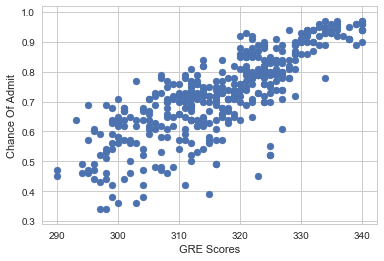

In [502]:
# the below for loop is to navigate to the last column of the dataset where we will have 'Chance Of Admit' data
for i in data.columns:
    k = i
plt.scatter(data['GRE Score'],data[k])
plt.xlabel('GRE Scores')
plt.ylabel('Chance Of Admit')
plt.show()

** Explanation :-**
* It is quite evident that the scores of 'GRE Scores' and 'Chance of Admit' are highly correlated i.e., Chances of Admit are high as the GRE Score is trending to nice scores.

* Hence it is an important factor in the determination of the chances of admission to a specific university in the perspective of an individual.

**Correlation of 'TOEFL Score' with respect to 'Chance of Admit'**

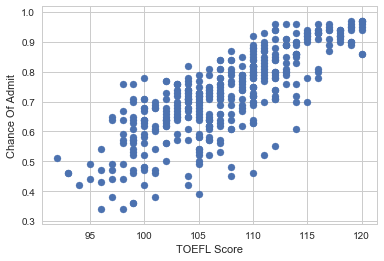

In [503]:
plt.scatter(data['TOEFL Score'],data[k])
plt.xlabel('TOEFL Score')
plt.ylabel('Chance Of Admit')
plt.show()

** Explanation:- **

* It is quite evident that the scores of 'TOEFL Scores' and 'Chance of Admit' are highly correlated i.e., Chances of Admit are high as the GRE Score is trending to nice scores.

* Hence it is an important factor in the determination of the chances of admission to a specific university in the perspective of an individual.

**Correlation of 'University Rating' with respect to 'Chance of Admit'**

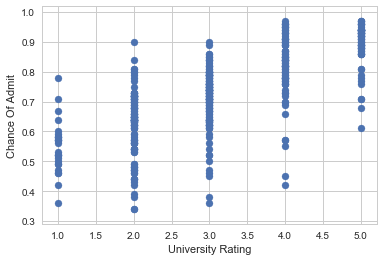

In [295]:
sns.set(style = 'whitegrid')
plt.scatter(data['University Rating'],data[k])
plt.xlabel('University Rating')
plt.ylabel('Chance Of Admit')
plt.show()

** Explanation:- **

* It intuitively shows the intimate relationship between the 'University Rating' and the 'Chance of Admit'.
* It seems that most of the people who are admitted for a certain university is predominantly concentrated between University Rating '2.0' and '4.0'.

**Correlation of 'Statement of Purpose' with respect to 'Chance of Admit'**

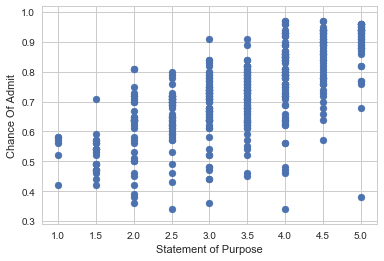

In [296]:
plt.scatter(data['SOP'],data[k])
plt.xlabel('Statement of Purpose')
plt.ylabel('Chance Of Admit')
plt.show()

**Explanation :- **

* It describes the skill of an individual to write effectively to an abroad university regarding his life style, motivation for choosen career path and his/her goals.

**Correlation of 'LOR' with respect to 'Chance of Admit'**

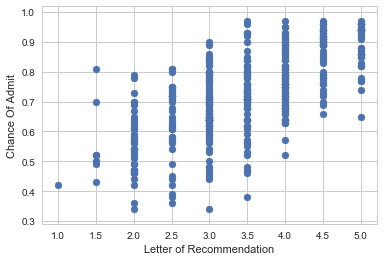

In [297]:
# below for loop is to obtain the index of 'LOR' in the dataset
j = 0
for i in data.columns:
    if j == 5:
        n = i
    j += 1
#print data[n]
# visualizations
plt.scatter(data[n],data[k])
plt.xlabel('Letter of Recommendation')
plt.ylabel('Chance Of Admit')
plt.show()

**Explanation :- **
* It describes a sheer intuition that the Letter Of Recommendation shows a striking factor in influencing an individuals over all chances for getting admission in a specific university.

**Correlation of 'CGPA' with respect to 'Chance of Admit'**

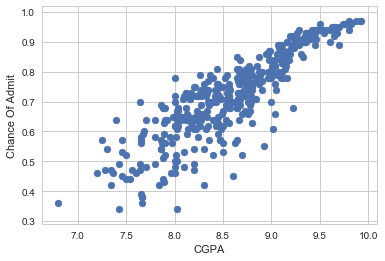

In [298]:
plt.scatter(data['CGPA'],data[k])
plt.xlabel('CGPA')
plt.ylabel('Chance Of Admit')
plt.show()

**Explanation :- **
* It clearly shows that the individuals who got higher scores in their Under Graduation, have higher scope of getting admission in a desired university.

**Correlation of 'Research' with respect to 'Chance of Admit'**

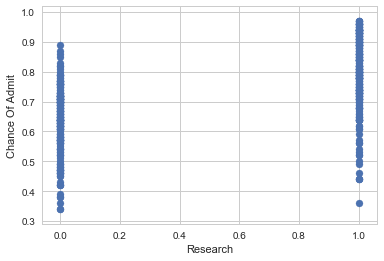

In [299]:
plt.scatter(data['Research'],data[k])
plt.xlabel('Research')
plt.ylabel('Chance Of Admit')
plt.show()

**Explanation :-**
* From this we can understand that the students who don't pursue a Research in their career before going to a Masters Program may also possess a good chance of getting admitted to a specific university of their desire.

* And it also states how the chances predominantly increased with the pursuing of Research in thier career before going to a Masters Program.

**Intuition :-**


** From these scatter plots, we can understand the exceptional relationships between the features and the target variable.Hence we can state that the data is consistent and show's striking relationships that could make the model more accurate and reliable for predicting the data values that are new and novel to the model.**

## DATA PREPROCESSING ##

* Data Preprocessing is one of the key procedures in Machine Learning that involves transforming the raw input data into an understanable format.

* This step is quite crucial because the Real-World data is often incomplete and inconsistent, or lacking in certain behaviours or trends, and is most probably consists of many errors.

* Data Preprocessing is a proven procedure for solving this problems and it prepares raw data for further processing.

* In the current problem an irrelevant feature is present that is 'Serial No',which actually plays no role in the determination of the 'Chance Of Admit' rate.Hence, it is quite valid to remove it from the dataset.


**Process of Data Preprocessing :-**

* A typical data preprocessing procedure has the following criteria :-

    * Incomplete: lacking attribute values, lacking certain attributes of interest, or containing only aggregate data.
    * Noisy: containing errors or outliers.
    * Inconsistent: containing discrepancies in codes or names.


**Tasks in data preprocessing:-**

* Data cleaning: fill in missing values, smooth noisy data, identify or remove outliers, and resolve inconsistencies.
* Data discretization: part of data reduction, replacing numerical attributes with nominal ones.
* Data integration: using multiple databases, data cubes, or files.
* Data transformation: normalization and aggregation.
* Data reduction: reducing the volume but producing the same or similar analytical results.


** Feature Selection :-**
* Feature Selection is an important concept in the Data Preprocessing phase which involves the removal of irrelevant attributes and retaining only those features that have show better performance.

* I implemented Feature Selection using a Linear Regressor, the benchmark model that i used to prune the features that acutally have a lower rank of performance.

* Recursive Feature Elimination(RFE) uses a model (here Linear Regressor) to select either the best or worst performing feature, and then simples prunes the feature. After this the entire process is iterated until all the features in the data set are used up(limit).

* Sklearn has an inbuilt RFE function i.e., sklearn.feature_selection and I'm using this along with my Linear Regressor Model.

In [767]:
# storing the associated ranks of the features.
from sklearn.preprocessing import MinMaxScaler
ranks = {}
# Creating a function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    min_max = MinMaxScaler()
    ranks = min_max.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda m: round(m,4), ranks)
    return dict(zip(names, ranks))

In [768]:
# implementing feature selection using RFE
f= features
v = scores
# import RFE from sklearn.feature_selection
from sklearn.feature_selection import RFE

# using a linear regressor
lr = LinearRegression(normalize=True)

# stop the search when only the last feature is left
rfe = RFE(lr, n_features_to_select=1,verbose=3,step=1)

rfe.fit(f,v)

#print(rfe.ranking_)

ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), data.columns, order=-1)

Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.


In [769]:
# Printing the ranks of the respective features :-
#print(rfe.ranking_)
print(ranks)
#print(features)

{'RFE': {'CGPA': 1.0, 'Research': 0.8571, 'TOEFL Score': 0.4286, 'GRE Score': 0.2857, 'SOP': 0.0, 'University Rating': 0.5714, 'Serial No.': 0.1429, 'LOR ': 0.7143}}


**Observation:-**
* Hence, by this intuition I came to the conclusion that the features with worst ranking i.e., the features having the rank with highest values are literally pruned from the dataset.

* Here, we observe that the feature obviuosly 'Serial No.' although having a good rank, it potentially adds nothing to the value of determining the score of 'Chance of Admit'.

* Although the features such as 'CGPA' , 'Research' 'SOP' are given high scores, since they are key factors in determining an individuals personal qualification for getting a fair admission and the universities in abroad have a different set of factors to consider from an individual before providing the admission. As the 'CGPA' ,'SOP' and 'Research' are the key elements in providing an individual scholarships and other benefits, it worth not to ignore them.

* Hence, I decided to remove 'Serial No.' attribute from the dataset.

** Removing Irrelevant attribute 'Serial No.' from the data set**

In [770]:
# Removing 'Serial No.' from the data set.
features = features.drop('Serial No.',axis=1)
# Fresh features after the irrelevant attribute removal 
print(features)

     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
0          337          118                  4  4.5   4.5  9.65         1
1          324          107                  4  4.0   4.5  8.87         1
2          316          104                  3  3.0   3.5  8.00         1
3          322          110                  3  3.5   2.5  8.67         1
4          314          103                  2  2.0   3.0  8.21         0
5          330          115                  5  4.5   3.0  9.34         1
6          321          109                  3  3.0   4.0  8.20         1
7          308          101                  2  3.0   4.0  7.90         0
8          302          102                  1  2.0   1.5  8.00         0
9          323          108                  3  3.5   3.0  8.60         0
10         325          106                  3  3.5   4.0  8.40         1
11         327          111                  4  4.0   4.5  9.00         1
12         328          112           

## ALGORITHMS AND TECHNIQUES ##

** By observing the problem, it is quite evident that it is a 'Regression' Problem.**


** It is important to understand the intuition behind the consideration of specific model, since it has to generate an optimal possibility of results that can improve the model's performance on a sample of new data.**


** Hence, taking the performance of the model into consideration, I chose three Supervised Machine Learning Algorithms that can be better compatible for the data being available.**

** They are :-**
   * Decision Trees
   * Ensemble Methods - Random Forests
   * Support Vector Machines (SVM)

**Decision Trees:-**

* Decision Trees are very flexible,easy to understand and easy to debug.They usually work on Classification and Regression Problems i.e.,for categorical problems having [green,red,blue..etc.] and continuous inputs like [2.9,3.8..etc].They usually cover both the perspectives. 

* It divides the  dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. A decision node has two or more branches, each representing values for the attribute tested. Leaf node represents a decision on the numerical target. The topmost decision node in a tree which corresponds to the best predictor called root node. Decision trees can handle both categorical and numerical data.

* As the given data is comprised of continuous features,Decision Trees perform well in regression tasks.

**Ensemble Methods - Random Forests :-**

* Random forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes in case of the classification tasks or mean prediction for the regression tasks of the individual trees.

* The Random forests have a stroke of brilliance when a performance optimization happens to enhance precision of the model, or vice versa.Tuning down the fraction of features that is considered at any given node can let you easily work on datasets with thousands of features.

* Since Random Forests perform well on almost every machine learning problem and they also show less overfit behavior when compared to Decision Trees. Since our problem is composed of a lot of continuous features for which Random Forests  serve a better choice.

**Support Vector Machines :-**

* SVM's are simple,accurate and perform well on smaller and cleaner datasets.It can be more efficient as it uses subset of training points.

* The Support Vector Regression (SVR) uses the same principles as the SVM for classification, with only a few minor differences. Initially as the output is a real number and continuous it becomes very difficult to predict the information at hand, which has infinite possibilities.

* In the case of regression, the factor margin of tolerance (epsilon) is set in approximation to the SVM.

* The main theme for SVM is always to minimize error, particularize the hyperplane which maximizes the margin, keeping in mind that part of the error is convinced. 

* Since For the current regression problem consists of a lot of continuous features the application of SVM's can serve a better purpose.

** Data Preprocessing :-** 
* It is one of the key phases in the Machine Learning Problems and the complete process and implementation steps are discussed above in the 'DATA PREPROCESSING' Phase of the project.

**Model Tuning :-**

* In this part of the project, I'll apply the GridSearchCV technique to further optimize the best model that was selected from the three supervised learning models stated above.

**Grid Search CV:-**

* Grid Search technique is an approach for tuning the parameters that are used to build and evaluate a model based on the individual combination of parameters of an algorithm specified in a grid.

* Grid Search rigorously checks for the combination of hyper-parameters in order to find the best model.

* Finally it's easy to figure out the combination that has high cross validation accuracy with respect to the parameters considered that eventually contribute to the optimization of the learning algorithm

** By the next approach, I will chose the best of these of three models, that can be an optimized model for the data set.**

** I will then use the performance metric (r2_score) and compare the three potential based on their scores, the model which has the best r2_score will be eventually considered for further analysis.**

** Eventually I'll optimize the selected model by 'GridSearchCV' and evaluate the model by comparing the final r2_score of the optimized model and the benchmark model.**

## IMPLEMENTATION OF THE COEFFICIENT OF DETERMINATION :- ##

In [771]:
# Import 'r2_score'
from sklearn.metrics import r2_score
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true,y_predict)
    
    # Return the score
    return score

## SHUFFLING AND SPLITTING THE DATA ##

In [772]:
# Import 'train_test_split'
from sklearn.cross_validation import train_test_split
# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features,scores,test_size=0.2,train_size=0.8,random_state=10)

# Successful shuffle and split of the data
print("Training and testing split was successful.")

Training and testing split was successful.


## BENCHMARK MODEL ##

** DEFINITION :- **

* A Bench Mark Model can be defined as a standard model that already shows a better performance on a given data.The factors on which our results or the solution is tested, are mostly going to be the amount of training/testing data, and then we compare your solution with that of the benchmarked solution obviously based on a performance metric(here r2_score).

* The main theme here is to understand which model works delivers the best solution than their existing solution.So, it can be achieved by sheer analysis, implementing standard algorithms and observance and coming to the conclusion that the model shows good solutions or results than the benchmark model's solution.

* Since, the problem is a **'Regression'** task , I'm implementing a  **'Linear Regression'** model as my **BenchMark Model**.

In [773]:
# importing Linear Regression model library from sklearn
from sklearn.linear_model import LinearRegression

# Create a linear regression object
reg = LinearRegression()

# Fitting the model using the training sets
reg.fit(X_train, y_train)

# Making predictions using the testing set
y_pred = reg.predict(X_test)

In [774]:
# Calculating the performance of the model 
score  = performance_metric(y_test,y_pred)
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.757.


**Explanation :- **

* It is evident that the Linear Regression Model (BenchMark Model) shows a striking performance of 0.757 which means that the target variable('Chance Of Admit') caputerd 75.7% of variance.

## IMPLEMENTATION ##

** In the further section of the project, I'll intuitively select the best out of the three models that I considered for the current problem by using the performance metric(r2_score), based on the results generated, I'll decide best of the three models, which is optimal for the given problem.**

## INITIAL MODEL EVALUATION :-##

** In this section, I'll clearly show the coding implementation of the three supervised learning models**
* Import the necessary libraries and intialize the models and store them in respective variables.
* And finally comparing the r2_scores of the three learning models and decide which one is the best.

**1.** **Decision Tree Regressor**

In [775]:
# import necessary library
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree Regressor Object
dec_reg = DecisionTreeRegressor(random_state=42)

# Fitting the model using training sets
dec_reg.fit(X_train,y_train)

# Making predictions using the testing set
dec_pred =  dec_reg.predict(X_test)

# Calculating the performance of the decision tree regressor model
dec_score = performance_metric(y_test,dec_pred)
print("Model has a coefficient of determination, R^2, of {:.2f}.".format(dec_score))

Model has a coefficient of determination, R^2, of 0.54.


**2. Support Vector Regressor **

In [776]:
# import necessary library
from sklearn.svm import SVR

# Create a Support Vector Regressor Object
svr_reg = SVR()

# Fitting the model using training sets
svr_reg.fit(X_train,y_train)

# Making predictions using the testing set
svr_pred =  svr_reg.predict(X_test)

# Calculating the performance of the decision tree regressor model
svr_score = performance_metric(y_test,svr_pred)
print("Model has a coefficient of determination, R^2, of {:.2f}.".format(svr_score))

Model has a coefficient of determination, R^2, of 0.57.


**3. Random Forest Regressor**

In [777]:
# import necessary library
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor Object
rfr_reg = RandomForestRegressor(random_state=42)

# Fitting the model using training sets
rfr_reg.fit(X_train,y_train)

# Making predictions using the testing set
rfr_pred =  rfr_reg.predict(X_test)

# Calculating the performance of the decision tree regressor model
rfr_score = performance_metric(y_test,rfr_pred)
#plt.scatter(y_test,y_pred)
#plt.show()
print("Model has a coefficient of determination, R^2, of {:.2f}.".format(rfr_score))

Model has a coefficient of determination, R^2, of 0.71.


## CHOOSING THE BEST MODEL ##

** Since, it is obvious that the model which has best high r2_score when compared to the other models can be termed as the best optimal model for the current problem, as the fact that if :-**
   * r2_score is 0 -> it indicates that the model is a worst fit to the given data.
   * r2_score is 1 -> it indicates that the model is the best fit to the given data.
   * r2_score in between 0 and 1 -> indicates that the respective variability exhibited by the target varaible.

** The values can be tabulated as follows :-**

#### Results:

|     Metric     | Decision Tree Regressor Model | Support Vector Model | Random Forest Regressor Model |
| :------------: |             :---------------: |      :-------------: |    :-----------------------:  |
|r2 score        |                  0.54         |             0.57     |            0.71               |



**Intuition :-** **Chossing the best Model**
* The major analysis that can be obtained from the above tabulated data is that the 'Random Forest Regressor Model' is the best model among the three, since it exhibits a high score of 0.71i.e, the target variable accounted for about 71% of the variance.

* And Support Vector Regressor shows a score of '0.57' which indicates that 57% is accounted for the target variable..

* Decision Tree Regressor shows a decent score of '0.54' which indicates that 54% is accounted for the target variable.

## REFINEMENT ##

** In this section of the project, the model('Random Forest Regressor Model') is optimized by the application of 'GridSearchCV' technique for fine tuning the parameters for the final model thus choosen and later calculating the performance metric(r2_score) of the optimized model.**

## MODEL TUNING##

** Here, I will find the implementaion of GridSearchCV by intially importing the libraries sklearn.grid_search.GridSearchCV and sklearn.metrics.make_scorer.**

** 1. Initialize the regressor('Random Forest Regressor Model') and store it in the varaible 'lgr_grid'.**

** 2. Creating a dictionary of parameters, in the variable parameters.**

** 3. Using make_scorer to create a r2_score scoring object. -> scorer**

** 4. Perform Grid Search on the Regressor lgr_grid using the 'scorer', and store it in grid_obj.**

** 5. Fit the Grid Search Object to the training data (X_train, y_train) and store it in the grid_fit.**

In [784]:
# importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV


def fit_model(X_train,y_train):
    # Initialize the Regressor
    lgr_grid = RandomForestRegressor(random_state=42)
    
    # Create the parameters list to tune.
    params = {"n_estimators"      : [105,205,305],
              "max_features"      : ["auto", "sqrt", "log2"],
              "min_samples_split" : [2,4,8],
              "bootstrap": [True, False]}
    
    # Make an r2_scorer scoring object using make_scorer()
    scorer = make_scorer(performance_metric)

    # Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
    grid_obj = GridSearchCV(lgr_grid,params,scoring=scorer)

    # Fit the grid search object to the training data and find the optimal parameters using fit()
    grid_fit = grid_obj.fit(X_train,y_train)

    # calculate the estimator
    best_clf = grid_fit.best_estimator_

    # Return the optimal model after fitting the data
    best_predictions = best_clf.predict(X_test)

    return grid_fit.best_estimator_

In [785]:
rfrr_reg = fit_model(X_train, y_train)
rfrr_pred = rfrr_reg.predict(X_test)
print("regression score of {:.3f}".format(performance_metric(y_test,rfrr_pred)))
# Produce the value for 'max_depth'
#print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

regression score of 0.761


** Observation :-**

* It is quite obvious that the 'Random Forest Regressor' Model showed a best improvement upon Model Tuning using the GridSearchCV technique.

* We can observe the trend of the improvement by the values tabulated as follows :-



|     Metric     |    Random Forest Regressor(Before Tuning)       | Random Forest Regressor Model(After Tuning) |
| :------------: |       :---------------:                         |         :-----------------------:           |
|   r2 score     |                  0.71                           |                     0.761                   |


** It is quite evident from the table that the Random Forest Regressor showed a good improvement upon optimization by the target variable accounting for about 76.1% of the variance.**

## FINAL MODEL EVALUATION ##

** In this part of the project I'll demonstrate the comparison of the performances between the BenchMark Model('Linear Regressor') and the Opmital Model('Random Tree Regressor') based on their performance metrics(r2_score) in a tabular form.**


#### Results



|     Metric     |        Linear Regressor Model(BenchMark Model)  | Random Forest Regressor Model(Optimal Model)|
| :------------: |       :---------------:                         |         :-----------------------:           |
|   r2 score     |                  0.757                          |                     0.761                   |



#### Observation :-

** Although the performances of the BenchMark Model and the Optimal Model thus considered are quite figurative and are literally showing nearly similar performances, it is quite evident that the Random Forest Regressor Model(Optimal Model) shows an awesome performance than the Linear Regressor Model(BenchMark Model).**

** And it is quite obvious that Random Forest Regressor Model i.e., Optimal Model shows a better performance on the input dataset.**

## MODEL VALIDATION ##

**In this part of the project, I'll demonstrate the performance of the Best Model for the given regression task i.e., The Optimal Model aganist unseen data.**

### Task - Predicting The Ratings of Chance Of Admit 

** Imagine that there are four students who want to pursue Masters Program in the United States Of America and for that they have already written and arranged all the prerequisites like GRE Scores, TOEFL Scores etc. they now want to know the chances of being admitted to the university of a specific rating for which they are willing to study.**

** Reckon that the data of the three students are as follows :-**

|Feature | Student 1 | Student 2 | Student 3  |  Student 4  |
| :----: | :-------: |  :------: | :--------: |  :-------:  |
|GRE SCORE|   320    |   315     |   330      |    222      |
|TOEFL SCORE| 115    |   118     |   116      |    120      |
|University Rating|4.5 |   4     |    5       |    4.5      |
|SOP     |   4       |     4.5   |    5       |     4       |
| LOR    |   4       |     3.5   |   4.5      |     5       |
| CGPA   |   9.85    |     9.65  |   9.71     |    9.92     |
|Reseach |   1       |    0      |    1       |    1        |

In [787]:
# Following is the code for predicting the chance of admit rating by considering the Random Forest Regressor Model i.e.,The Optimal Model 
#k_scores = reg.feature_importances_
# Producing a matrix for the student data
student_data = [[320,115,4.5,4,4,9.85,1],
                [315,118,4,4.5,3.5,9.65,0],
                [330,116,5,5,4.5,9.71,1],
                [222,120,4.5,4,5,9.92,1]]
# Displaying the results
#print(k_scores)
#print student_data
#print reg.predict(student_data)
#plt.plot(reg.predict(student_data),student_data)
#plt.show()
for i, score in enumerate(rfrr_reg.predict(student_data)):
    print("Predicted chance of admit ratings for Student {}'s: {:,.2f}".format(i+1, score))

Predicted chance of admit ratings for Student 1's: 0.90
Predicted chance of admit ratings for Student 2's: 0.83
Predicted chance of admit ratings for Student 3's: 0.94
Predicted chance of admit ratings for Student 4's: 0.83


** Intuition :-**

* For Student-1 the predicted score is quite accurate because has a significant good scores in GRE, TOEFL,and CGPA, and also has research experience and the university that he is willing to get admitted is a high rated one i.e, 4.5 it expects the students with reasonably high scores than good scores, so chances for getting an admission is possible pretty easily of his performance and hence the admit rate is also very high.

* For Student-2 the predicted score is accurate because he has a considerably good scores in GRE, TOEFL and CGPA but he doesn't have any research experience and also has the aspiration for getting an admission in a high rated university. These factors might hindered his admitting chance rate to an above average one.

* For Student-3 the predicted score is accurate because he has a consistent good scores in GRE, TOEFL, CGPA and also has a research experience. Since the scores are pretty high and also has the aspiration for getting an admission in a high rated university which can be possible pretty easily of his performance and hence the admit rate is also very high.

* For Student-4 the the predicted score is accurate because although he has good TOEFL and CGPA scores and indeed having a researhc experience, it is quite evident that he has pretty low GRE Score and also has the  aspiration for getting an admission in a high rated university, but due to low score in GRE, his chances of admission were dropped to above average rating.

## JUSTIFICATION ##

** By observing the validation results above, it is quite evident that the model is performing well on the given data.**

** When compared to the BenchMark Model, the Optimal Model('Random Forest Regressor Model') indeed shows a striking performance as shown in the Table-4 of the 'Final Model Evaluation' section.**
  * Although the performance scores are so close and similar, it is likely to understand that the Optimal Model('Random Forest Regressor Model') holds a tight control in generalizing the input data.
  * The performance of the BenchMark Model is 75.7 % and that of the Optimal Model is 76.1%.



** It is also important to note that the individuals chances of getting an admission in their dream university are predominantly dependent on his/her performance in the prerequisite tests and will to succeed in their respecive careers.**

** The model can be applied or is useful for students who are aspiring for a certain university of their desire to pursue their education and build their career.**

** In summary the application of the model is quite useful only in the domain of 'Education' and that the data should be very  consistent that if any miscrepancies in the features may lead to bad predictions i.e., a good student may get a bad prediction and a student with ill IQ can gain advantage of it.**

## FREE FORM VISUALIZATION ##

** In this part of the project, I'll illustrate the most important features in the final model using "feature_importances_" attribute of the regressor and plot them nicely using a bar graph and provide intuition about them.**

#### Process

* Initialize the 'feature_importances_' attribute of the regressor and store in the best_model variable.
* Then pass it to the 'feature_plotbest' function that nicely plots the important attributes in a bar plot.
* Finally a brief discussion on the consideration of those features in the project.

#### Coding Implementation

In [788]:
# feature plot function which plots the important features interactively.

def feature_plotbest(model_features, X_train, y_train):
    
    # Extracting the five most significant features from the 
    feature_indices = np.argsort(model_features)[::-1]
    feature_columns = X_train.columns.values[feature_indices[:5]]
    values = model_features[feature_indices][:5]

    # Create the plot
    plt.figure(figsize = (9,5))
    # Creating a title for the graph
    plt.title("Featured Weights for First Five Most Predictive Features", fontsize = 16)
    
    #plotting the bar plot intuitively
    plt.bar(np.arange(5), values, width = 0.6, align="center", color = 'red', label = "Feature Weight")
    
    plt.xticks(np.arange(5), feature_columns)
    plt.xlim((-0.5, 4.5))
    # labelling the y-axis
    plt.ylabel("Weight")
    # labelling the x-axis
    plt.xlabel("Feature")
    # labelling the legend
    plt.legend(loc = 'upper center')
    plt.tight_layout()
    plt.show()  

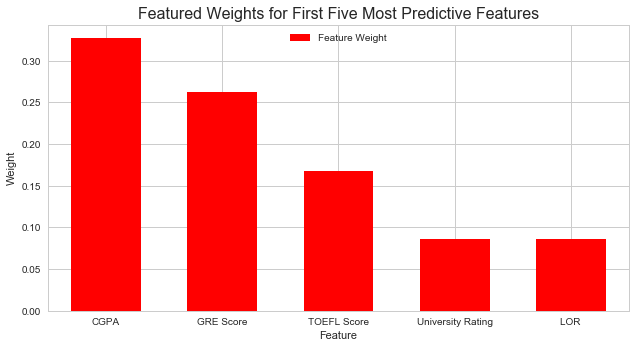

In [790]:
# Extracting the best features from the best model i.e, the Optimal Model using 'feature_importances_' 
# attribute of the Random Forest Regressor
model_best_features = rfrr_reg.feature_importances_

# Calling the function 'feature_plotbest' to intuitively plotting the best features of the best model for the data set.
feature_plotbest(model_best_features, X_train, y_train)

** Intuition for the visualization of Feature Importance :- **

* From the bar plot it is quite clearly visualized about the most important features that contribute to the 'Chance of Admit' rating.

* The features are :-
   * CGPA
   * GRE Score
   * TOEFL Score
   * Univerity Rating
   * Letter Of Recommendation (LOR)
   
* By the visualization I can state that the results were accurate because of the following characteristics regarding the data:-
  * Every University in the United States of high profile always expects the students who are having very good performance in their under graduation studies.So, it is quite clear that it is the most preferred feature for an individual's chances of getting an admission.
  * The second important factor in the determination of an individual's chances for getting an admission in abroad universities especially for the high profiled US universities is the GRE score.Hence, it is quite clearly preferred feature for an individual's chances of getting an admission in a specific university.
  * The third most important factor in determining the individual's admission opportunities is the TOEFL(Test For English As A Foreign Language) score, which checks for the English understanding skills of the individual. Hence, it is clearly mentioned feature that plays a crucial role in the individual's chances for gettign an admission in the specific university.
  * The fourth important feature is the University Rating feature, which tells about the university rating that the individual is interested in getting an admission for. The greater the rating of a specific university, the harder the chances of admission and higher the facilities and standards.
  * The final feature is the LOR(Letter of Recommendation), which is a formal letter describing the individual's personal strength's and capabilities written to and observed by the universities and determine the skill set of the individual, it definitely plays a good role in improving the individual's chance of getting admission opportunities.

## REFLECTION ##

** The process used for this project can be summarized using the following steps:-**

1. A Common Problem on Graduate Admissions is found in "Kaggle" and the data set related to it is acquired from the Public Domain.
2. The Dataset was downloaded and loaded for the current project and necessary statistics were calculated.
3. The Data Set is Explored with scatter-plots to illustrate the correlation of the input features with respect to the target variable.
4. The Data Set is preprocessed using the technique "Feature Selection" and irrelevant attributes are removed from the dataset.
5. A function is designed that calculates the performance metric r2_score and returns that score.
6. The data is splitted into 80% training and 20% testing data.
7. A BenchMark was created for the Regressor i.e, here Linear Regressor acts as a BenchMark Model and is trained using the training data.
8. Then three supervised learning models were trained using the training data and a comparision is done based on the performance metric and decided which among the three is the best model.
9. The best model thus selected is optimized by the application of 'GridSearchCV'.
10. The optimized model is then compared with the BenchMark Model and came to the conclusion that the Optimzed Model shows a better performance than the BenchMark model.
11. Finally the Optimized Model which is selected as the best model for the input data is validated aganist unseen data and the performance and intuition was documented clearly.


* I personally found the steps 3 and 4 most challenging because I have to completely understand my data and draw relevant intuition from it. And I literally struggled very hard on 'Feature Selection' step and took a long research to implement Recursive Feature Elimination(RFE) to my data set and eliminate the irrelevant attributes which were quite challenging because I came with a lot of background understanding about the dataset before actually removing the irrelevant features from the dataset because the most important features were actually termed as irrelevant for which I later on went to explain the reason behind the relevancy and only removed those features that actually had no relevance at all.

* Regarding the interesting aspects of the project, the dataset itself is very consistent and very useful since it gives good insight in the active problems that is being common in the minds of the individuals who are planning to study abroad because there are a lot of factors that the universities consider in order to provide admissions to individuals.Hence, I'm glad to say that I devised a model that could actually understand the score patterns of the individuals and determine their chance of admission in the respective university they wish to pursue their career goals.

* This model can actually be used in the public domain where people can actually check their probability of admission rates in abroad countries especially United States Of America by feeding the models with certain prerequisites like GRE Scores and TOEFL Scores etc.

## IMPROVEMENT ##

** Potentially the 'Data Preprocessing' phase is the crucial part of any Machine Learning Problem, Since during this phase we can potentially identify the flaws in the data set that could actually mess the results and performance of the model thus considered.**
  * Hence, removing irrelevant data during this phase can predominantly increase the model's performance and can benefit in generalized results.
  * But I personally feel that the feature selection that I used is good but there are other techniques that are used for the application of Feature Selection.
  * Since, this is a regression task, the Wrapper Method implementation i.e., RFE may not be the best one.
  * There is also room for trying Embedded method such as LASSO and  Elastic Net and Ridge Regression that don't need the external implementation of the feature selection techniques , since these methods have embedded feature selection and regularization built in. It's worth a trial, since there is always scope for improving the model performance aganist the given dataset.
  * Further more, some ensemble methods such as 'XGBOOST' should also take care of larger data dimensions and these methods can themselves be used for feature selection.


**There are lot of other possibilites that can make the feature selection more intuitive and literally I am new to this and the 'Feature Selection' implementation gave me a hard core challenging of applying it in real time.**